In [2]:
import ot
import torch
from multiprocessing import Pool

In [50]:
def wasserstein_distance(a, b, wa, wb):
        
    W_dist = ot.wasserstein_1d(a, b, wa, wb, p = 1)

    return W_dist

In [71]:
def fun(a, b, wa, wb):
    W_dist = torch.zeros(wa.size(0))

    for i in range(wa.size(0)):
        W_dist[i] = wasserstein_distance(a, b, wa[i], wb[i])

    return W_dist

In [83]:
def dataset_maker(n, m):
    
    zero = torch.zeros(m, n)
    one = torch.zeros(m, n)
    two = torch.zeros(m, n)
    three = torch.zeros(m, n)

    for i in range(m):
        zero[i] =  torch.tensor(ot.datasets.make_1D_gauss(n, m = i + 10, s = 5))
        one[i] =  torch.tensor(ot.datasets.make_1D_gauss(n, m = i + 40, s = 5)) 
        two[i] =  torch.tensor(ot.datasets.make_1D_gauss(n, m = i + 50, s = 5))
        three[i] =  torch.tensor(ot.datasets.make_1D_gauss(n, m = i + 70, s = 5)) 

    return torch.stack([zero, one, two, three])


In [103]:
def iterable(data, x):

    for i in range(data.size(0)):

        yield([x, x, data[0], data[i]])

In [92]:
m = 100
n = 100

dataset = dataset_maker(m, n)

In [93]:
import time 

x = torch.arange(n)

W_dist = torch.zeros(dataset.size(0), dataset.size(1))
# ite = iterable(dataset, x)

st = time.time()
for i in range(dataset.size(0)):
    
    W_dist[i] = fun(x, x, dataset[0], dataset[i])
    
et = time.time()
print(et-st)

print(W_dist)

# with Pool (processes = 2) as p:
#     st = time.time()

#     W_dist = p.starmap(fun, ite)

#     et = time.time()
#     print(et-st)

0.20290732383728027
tensor([[ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
        

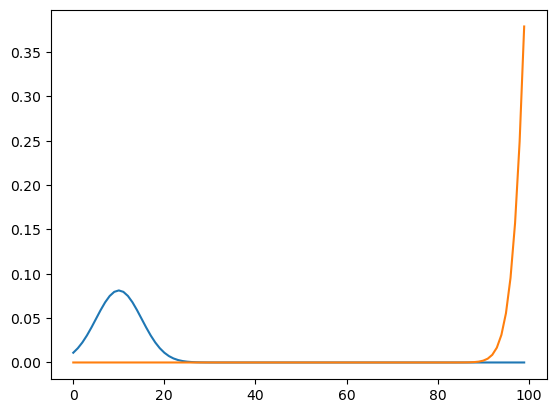

In [102]:
import matplotlib.pyplot as plt
plt.plot(x, dataset[0][0])
plt.plot(x, dataset[0][99])